### Kelompok     : 9
Anggota        :
- Amelia Adriani 
- Dinda Salsabiila 
- Deeva Nabila 

# TK 2  : Machine Learning Untuk Klasterisasi Tingkat Kematangan Buah Jeruk Lokal Menggunakan K-Means Clustering

# Step 1: Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score,adjusted_rand_score
from sklearn.metrics import silhouette_score

# Step 2: EDA

### 2.1: Loading data

In [2]:
data = pd.read_csv('HSV Jeruk.csv')
data.head()

,No,Kemungkinan,H,S,V
0,1,BM,82.618475,128.652525,112.761750
1,2,BM,87.029425,141.295950,110.023025
2,3,BM,84.977175,127.012425,116.185075
3,4,BM,86.270425,126.892975,106.896600
4,5,BM,85.454225,156.798725,86.185750


In [3]:
data.shape

(27, 5)

### 2.2 Dropping unused data

In [6]:
#penghapusan kolom dataframe yang tidak diperlukan dengan membuat variabel baru df
data_new = data.drop(columns=['No','Kemungkinan'])
data_new.head()

,H,S,V
0,82.618475,128.652525,112.761750
1,87.029425,141.295950,110.023025
2,84.977175,127.012425,116.185075
3,86.270425,126.892975,106.896600
4,85.454225,156.798725,86.185750


In [7]:
data_new.shape

(27, 3)

### 2.3: Normalization data

In [8]:
std = MinMaxScaler().fit_transform(data_new)

data_std = pd.DataFrame(std, columns=['H','S','V'])
data_std.head()

,H,S,V
0,0.000000,0.020407,0.272171
1,0.204452,0.167042,0.249204
2,0.109328,0.001385,0.300878
3,0.169271,0.000000,0.222987
4,0.131440,0.346839,0.049310


### 2.4: Visualization data

#### 2.4.1 Chosing principal data

In [10]:
pca = PCA(n_components=2)
arr_pca = pca.fit_transform(std)
arr_pca

array([[-0.62488742,  0.27581099],
       [-0.43388884,  0.11919871],
       [-0.54752337,  0.27813461],
       [-0.55511923,  0.20099602],
       [-0.50738625, -0.11653646],
       [-0.40939138, -0.14558315],
       [-0.60720688,  0.04506204],
       [-0.4285565 , -0.14682307],
       [-0.25726685, -0.24790836],
       [-0.26900077, -0.08911464],
       [-0.03059277, -0.193554  ],
       [-0.21070838, -0.01413266],
       [-0.1137071 , -0.05334162],
       [-0.24229866, -0.04567521],
       [ 0.0579975 , -0.08942034],
       [-0.08666673, -0.107099  ],
       [ 0.08578833, -0.14473664],
       [-0.02361125,  0.15267725],
       [ 0.52185047,  0.11420485],
       [ 0.51517208, -0.01090009],
       [ 0.61893878, -0.12408266],
       [ 0.58025741,  0.13688168],
       [ 0.63442161, -0.0044332 ],
       [ 0.50436986, -0.11825013],
       [ 0.5093977 , -0.13346983],
       [ 0.67089935,  0.26375902],
       [ 0.6487193 ,  0.19833591]])

#### 2.4.2 Mapping data

In [14]:
size_mapping = {'BM':2, 'SM':0, 'M':1}
data['Kemungkinan'] = data['Kemungkinan'].map(size_mapping)
mapp = data['Kemungkinan']

df_mapp = pd.DataFrame(mapp)
df_mapp

,Kemungkinan
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,0


In [15]:
df_mapp = df_mapp.values

maping = []
for i in range (len(df_mapp)):
    maping.append(df_mapp[i][0])
    
maping

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

### 2.4.3 Data plotting

No handles with labels found to put in legend.


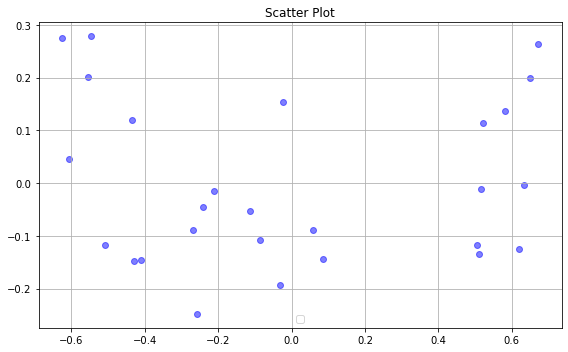

In [16]:
#targets = ['Belum Matang','Setengah Matang','Matang']
colors = ['b','b','b']

plt.figure(figsize=(8,5))

for i,color in zip ([0,1,2],colors):
    plt.scatter(arr_pca[mapp==i, 0],
                arr_pca[mapp==i, 1],
                color=color,
                alpha=0.5)

#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
plt.legend(loc='lower center')
plt.title('Scatter Plot')
plt.tight_layout()
plt.grid()
plt.show()

# Step 3: KMEAN Clustering

### 3.1 Load Dataframe for KMeans

In [11]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(arr_pca)
 
print(label)

[0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1]


### 3.2 KMeans Clustering and Plotting

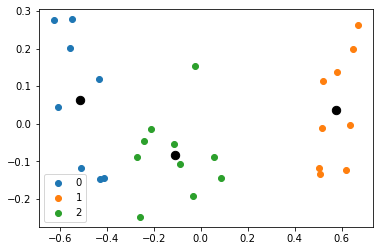

In [13]:
#Getting unique labels
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(arr_pca[label == i , 0] , arr_pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 70, color = 'k')
plt.legend()
plt.show()

# Step 4: Cluster Evaluation

### 4.1 Checking score accuration

In [18]:
round(rand_score(maping,label),1)

1.0

In [19]:
round(adjusted_rand_score(maping,label),1)

0.9

### 4.2 Checking ideal cluster

In [21]:
inertia = []
for k in range (1, 10):
    cluster_model = KMeans(n_clusters = k, random_state = 9)
    cluster_model.fit(arr_pca)
    inertia_value = cluster_model.inertia_
    inertia.append(inertia_value)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


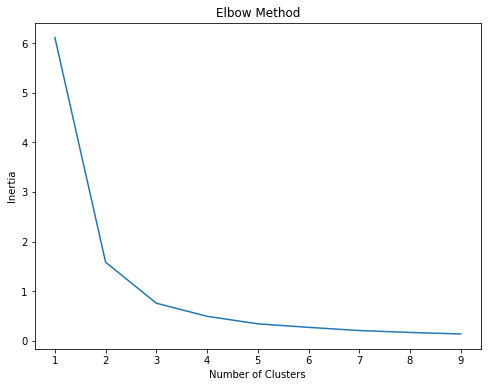

In [22]:
plt.figure(figsize=(8,6))
plt.plot(range(1,10), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()